In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Perceptron 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix
from sklearn import metrics, tree

In [2]:
df = pd.read_csv("books_without_outliers.csv", index_col = [0])
df_copy = df.copy()

In [3]:
df_copy.describe(include ='all')

,book_genre,book_rate,successfull_book,paperback,hardback,author,number_of_pages,book_length_mm,book_width_mm,book_depth_mm,book_weight_grams,publication_day,publication_month,publication_year,publisher,publication_city,publication_country,language,bestsellers_rank,price_nis
count,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225.000000,6225,6225,6225,6225.000000,6225.000000,6225.000000
unique,NaN,NaN,NaN,NaN,NaN,3775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,682,307,60,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Alexander McCall Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Penguin Books Ltd,London,United Kingdom,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407,3087,3511,NaN,NaN,NaN
mean,1.964819,4.062991,0.620080,0.610120,0.389880,NaN,300.126104,210.489333,143.827831,22.989595,383.531762,12.937189,6.606265,2014.114699,NaN,NaN,NaN,1.013173,57783.771727,69.429277
std,0.847013,0.260948,0.485406,0.487762,0.487762,NaN,115.711780,22.319650,21.295494,8.160141,197.401192,9.715791,3.298895,6.016768,NaN,NaN,NaN,0.203961,55669.107233,21.075414
min,1.000000,3.310000,0.000000,0.000000,0.000000,NaN,1.000000,144.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1997.000000,NaN,NaN,NaN,1.000000,1.000000,19.590000
25%,1.000000,3.890000,0.000000,0.000000,0.000000,NaN,224.000000,198.000000,129.000000,17.780000,241.000000,4.000000,4.000000,2011.000000,NaN,NaN,NaN,1.000000,12153.000000,53.000000
50%,2.000000,4.080000,1.000000,1.000000,0.000000,NaN,288.000000,206.000000,139.000000,22.860000,336.000000,11.000000,7.000000,2015.000000,NaN,NaN,NaN,1.000000,42682.000000,66.060000
75%,3.000000,4.250000,1.000000,1.000000,1.000000,NaN,368.000000,229.000000,155.000000,28.000000,499.000000,21.000000,9.000000,2019.000000,NaN,NaN,NaN,1.000000,83218.000000,81.800000


In [4]:
df_copy.dtypes

book_genre               int64
book_rate              float64
successfull_book         int64
paperback                int64
hardback                 int64
author                  object
number_of_pages        float64
book_length_mm         float64
book_width_mm          float64
book_depth_mm          float64
book_weight_grams      float64
publication_day          int64
publication_month        int64
publication_year         int64
publisher               object
publication_city        object
publication_country     object
language                 int64
bestsellers_rank         int64
price_nis              float64
dtype: object

## Let's change all the objects columns to numerical

In [5]:
authors = df_copy.author.unique()
replace_author = {authors[i] : i + 1 for i in range(0,len(authors))}
df_copy.replace(replace_author, inplace = True)

publishers = df_copy.publisher.unique()
replace_publisher = {publishers[i] : i + 1 for i in range(0,len(publishers))}
df_copy.replace(replace_publisher, inplace = True)

cities = df_copy.publication_city.unique()
replace_city = {cities[i] : i + 1 for i in range(0,len(cities))}
df_copy.replace(replace_city, inplace = True)

countries = df_copy.publication_country.unique()
replace_country = {countries[i] : i + 1 for i in range(0,len(countries))}
df_copy.replace(replace_country, inplace = True)

In [6]:
df_copy.dtypes

book_genre               int64
book_rate              float64
successfull_book         int64
paperback                int64
hardback                 int64
author                   int64
number_of_pages        float64
book_length_mm         float64
book_width_mm          float64
book_depth_mm          float64
book_weight_grams      float64
publication_day          int64
publication_month        int64
publication_year         int64
publisher                int64
publication_city         int64
publication_country      int64
language                 int64
bestsellers_rank         int64
price_nis              float64
dtype: object

In [7]:
df_copy.duplicated().sum()

0

### let's see the correlation between the rows

In [8]:
df_copy.corr()

,book_genre,book_rate,successfull_book,paperback,hardback,author,number_of_pages,book_length_mm,book_width_mm,book_depth_mm,book_weight_grams,publication_day,publication_month,publication_year,publisher,publication_city,publication_country,language,bestsellers_rank,price_nis
book_genre,1.000000,0.123069,0.184370,0.040296,-0.040296,0.900108,-0.250065,0.035692,0.140699,-0.158696,0.049225,0.022541,0.022203,-0.072224,0.476343,0.367441,0.188223,-0.047673,0.105023,0.143697
book_rate,0.123069,1.000000,0.432390,0.014124,-0.014124,0.091607,0.045651,0.055651,0.035916,0.044212,0.106285,0.008357,0.025287,0.002992,0.102384,0.109450,0.046145,0.022006,-0.054903,0.122615
successfull_book,0.184370,0.432390,1.000000,0.027100,-0.027100,0.152432,0.038417,0.042964,0.065611,0.023822,0.126941,0.020582,0.014607,-0.008843,0.148260,0.156242,0.107612,0.034188,-0.069608,0.138247
paperback,0.040296,0.014124,0.027100,1.000000,-1.000000,-0.147666,0.143054,-0.130339,-0.095507,-0.274729,-0.443966,-0.043711,-0.062527,-0.372477,-0.052698,0.064383,0.035245,-0.049114,-0.339458,-0.449981
hardback,-0.040296,-0.014124,-0.027100,-1.000000,1.000000,0.147666,-0.143054,0.130339,0.095507,0.274729,0.443966,0.043711,0.062527,0.372477,0.052698,-0.064383,-0.035245,0.049114,0.339458,0.449981
author,0.900108,0.091607,0.152432,-0.147666,0.147666,1.000000,-0.283235,0.080378,0.191652,-0.113691,0.138435,0.029539,0.020900,0.009573,0.505209,0.359809,0.177941,-0.027006,0.243954,0.226568
number_of_pages,-0.250065,0.045651,0.038417,0.143054,-0.143054,-0.283235,1.000000,0.020396,-0.111078,0.555495,0.314137,0.007180,-0.014890,0.054048,-0.239628,-0.155232,-0.076938,-0.084436,-0.115735,0.134754
book_length_mm,0.035692,0.055651,0.042964,-0.130339,0.130339,0.080378,0.020396,1.000000,0.318687,0.109018,0.381148,0.018769,0.012910,0.072841,0.105936,0.109839,0.069514,-0.087424,0.097658,0.404064
book_width_mm,0.140699,0.035916,0.065611,-0.095507,0.095507,0.191652,-0.111078,0.318687,1.000000,-0.018351,0.349025,0.000790,0.026716,0.038891,0.157280,0.138557,0.089117,-0.025992,0.093769,0.286508
book_depth_mm,-0.158696,0.044212,0.023822,-0.274729,0.274729,-0.113691,0.555495,0.109018,-0.018351,1.000000,0.419955,0.021036,0.026757,0.225575,-0.116787,-0.121890,-0.052711,-0.037457,0.031421,0.299890


In [9]:
df_copy.book_genre.value_counts()

1    2346
3    2127
2    1752
Name: book_genre, dtype: int64

### Building 3 data frames for each of the categories and concat them to one final df

In [35]:
number_of_rows = 1752

# here we took samples of fiction category
sample_fiction_df = df_copy[df_copy["book_genre"] == 1].sample(n = number_of_rows, random_state = 1)


sample_sport_df = df_copy[df_copy["book_genre"] == 2].head(number_of_rows)

# here we took samples of mbs category
sample_mbs_df =  df_copy[df_copy["book_genre"] == 3].sample(n = number_of_rows, random_state = 1)

In [11]:
data_frames = [sample_fiction_df, sample_sport_df, sample_mbs_df]

df_samples = pd.concat(data_frames)

### We had to make a multiclass classification because of our reaserch question

#### Macro average - when you have balanced categories.<br>

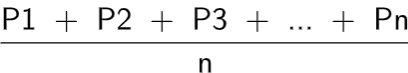

In [12]:
# building the X and y df's
X = df_samples.drop('book_genre', axis = 1)
y = df_samples['book_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


""" we wanted to test couple models and see the differences between them """

ml_models = {
    'RandomForest'      : RandomForestClassifier(),   
    'DecisionTree'      : DecisionTreeClassifier(),   
    'KNN'               : KNeighborsClassifier(), 
    'Naive Bayes'       : MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), 
}

df_metrics = pd.DataFrame([])

""" for loop to build the different models to predict and train them """
for model_name in ml_models:
    
    metrics = {}

    clf_model = ml_models[model_name].fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    y_pred_train = clf_model.predict(X_train)
    
    
    metrics['accuracy_on_test'] = accuracy_score(y_test, y_pred)
    
    metrics['accuracy_on_train'] = accuracy_score(y_train, y_pred_train)
    
    metrics['precision'] = precision_score(y_test, y_pred, average='macro')
    
    metrics['recall'] = recall_score(y_test, y_pred, average='macro')
    
    metrics['f1'] = f1_score(y_test, y_pred, average='macro')
    
    df_metrics = pd.concat([df_metrics,pd.DataFrame(metrics, index=[model_name]).T],axis=1)
    
    print("confusion_matrix of", model_name, ":")
    
    print(confusion_matrix(y_test, y_pred))
    
    print()
    
    
df_metrics.T.style.highlight_max(color='lightgreen').set_precision(3)

confusion_matrix of RandomForest :
[[555   1   1]
 [  5 480   7]
 [ 20  20 488]]

confusion_matrix of DecisionTree :
[[536  13   8]
 [  4 466  22]
 [ 19  19 490]]

confusion_matrix of KNN :
[[501  56   0]
 [ 27 439  26]
 [ 23  57 448]]

confusion_matrix of Naive Bayes :
[[395 138  24]
 [  6 309 177]
 [ 15 106 407]]



,accuracy_on_test,accuracy_on_train,precision,recall,f1
RandomForest,0.966,0.994,0.966,0.965,0.965
DecisionTree,0.946,0.995,0.946,0.946,0.946
KNN,0.880,0.926,0.883,0.880,0.880
Naive Bayes,0.705,0.692,0.726,0.703,0.707


# Let's find out the the hyperparameters for the models

### DecisionTree

In [15]:
clf_decision_tree = tree.DecisionTreeClassifier()
params = {"max_depth" : [2,4,6,8,10], "min_samples_split" : [3,5,7,9,11]}
clf_decision_tree_CV = GridSearchCV(clf_decision_tree, params , cv = 10)
clf_decision_tree_CV.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [3, 5, 7, 9, 11]})

In [16]:
print(f"best params are: {clf_decision_tree_CV.best_params_}")
print(f"best score is: {clf_decision_tree_CV.best_score_}")

best params are: {'max_depth': 2, 'min_samples_split': 3}
best score is: 0.9427090349447764


### KNN

In [32]:
clf_knn = KNeighborsClassifier()
params = {"n_neighbors" : [3,5,7,9,11,13,15]}
clf_knn_CV = GridSearchCV(clf_knn, params, cv = 25)
clf_knn_CV.fit(X,y)

GridSearchCV(cv=25, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]})

In [33]:
print(f"best params are: {clf_knn_CV.best_params_}")
print(f"best score is: {clf_knn_CV.best_score_}")

best params are: {'n_neighbors': 3}
best score is: 0.8837391108102008


### RandomForest

referenced from this link:
<u> https://www.kaggle.com/funxexcel/p2-random-forest-tuning-gridsearchcv </u> 

In [19]:
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [20]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [21]:
rf_Model = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

rf_Grid.fit(X, y)

print(rf_Grid.best_params_)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
{'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 33}


### Naive Bayes

In [22]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],}

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs = -1, cv = 15, verbose = 5)
multinomial_nb_grid.fit(X,y)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 15 folds for each of 5 candidates, totalling 75 fits
Train Accuracy : 0.691
Test Accuracy : 0.701
Best Accuracy Through Grid Search : 0.692
Best Parameters :  {'alpha': 0.01}


In [23]:
import matplotlib.pyplot as plt

In [24]:
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar();
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

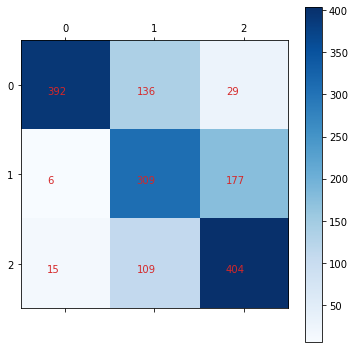

In [25]:
plot_confusion_matrix(y_test, multinomial_nb_grid.best_estimator_.predict(X_test))

## Now let's redo the process with the right hyperparameters

In [34]:
X = df_samples.drop('book_genre', axis = 1)
y = df_samples['book_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

ml_models = {
    'RandomForest'      : RandomForestClassifier(bootstrap = True, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 33),   
    'DecisionTree'      : DecisionTreeClassifier(max_depth= 2, min_samples_split=3),   
    'KNN'               : KNeighborsClassifier(n_neighbors =  3), 
    'Naive Bayes'       : MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True), 
}

df_metrics = pd.DataFrame([])

for model_name in ml_models:
    
    metrics = {}

    clf_model = ml_models[model_name].fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    y_pred_train = clf_model.predict(X_train)
    
    
    metrics['accuracy_on_test'] = accuracy_score(y_test, y_pred)
    
    metrics['accuracy_on_train'] = accuracy_score(y_train, y_pred_train)
    
    metrics['precision'] = precision_score(y_test, y_pred, average='macro')
    
    metrics['recall'] = recall_score(y_test, y_pred, average='macro')
    
    metrics['f1'] = f1_score(y_test, y_pred, average='macro')
    
    df_metrics = pd.concat([df_metrics,pd.DataFrame(metrics, index=[model_name]).T],axis=1)
    
    print("confusion_matrix of", model_name, ":")
    
    print(confusion_matrix(y_test, y_pred))
    
    print()
    
    
df_metrics.T.style.highlight_max(color='lightgreen').set_precision(3)

confusion_matrix of RandomForest :
[[557   0   0]
 [  7 485   0]
 [ 27  22 479]]

confusion_matrix of DecisionTree :
[[557   0   0]
 [  6 486   0]
 [ 24  25 479]]

confusion_matrix of KNN :
[[514  41   2]
 [ 26 441  25]
 [ 23  47 458]]

confusion_matrix of Naive Bayes :
[[395 138  24]
 [  6 309 177]
 [ 15 106 407]]



,accuracy_on_test,accuracy_on_train,precision,recall,f1
RandomForest,0.964,0.965,0.966,0.964,0.964
DecisionTree,0.965,0.964,0.967,0.965,0.965
KNN,0.896,0.941,0.897,0.896,0.895
Naive Bayes,0.705,0.692,0.726,0.703,0.707


## when you have class imbalance 

### Micro average

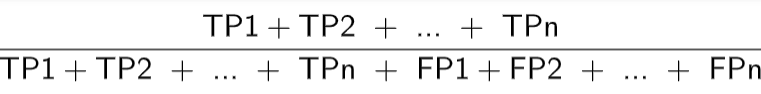

In [36]:
sample_fiction_df = df_copy[df_copy["book_genre"] == 1]
sample_sport_df = df_copy[df_copy["book_genre"] == 2]
sample_mbs_df =  df_copy[df_copy["book_genre"] == 3]

In [37]:
data_frames = [sample_fiction_df, sample_sport_df, sample_mbs_df]

df_samples = pd.concat(data_frames)

In [38]:
X = df_samples.drop('book_genre', axis = 1)
y = df_samples['book_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

ml_models = {
    'RandomForest'      : RandomForestClassifier(bootstrap = True, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 33),   
    'DecisionTree'      : DecisionTreeClassifier(max_depth= 2, min_samples_split=3),   
    'KNN'               : KNeighborsClassifier(n_neighbors =  3), 
    'Naive Bayes'       : MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True), 
}

df_metrics = pd.DataFrame([])

for model_name in ml_models:
    
    metrics = {}

    clf_model = ml_models[model_name].fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    y_pred_train = clf_model.predict(X_train)
    
    
    metrics['accuracy_on_test'] = accuracy_score(y_test, y_pred)
    
    metrics['accuracy_on_train'] = accuracy_score(y_train, y_pred_train)
    
    metrics['precision'] = precision_score(y_test, y_pred, average='micro')
    
    metrics['recall'] = recall_score(y_test, y_pred, average='micro')
    
    metrics['f1'] = f1_score(y_test, y_pred, average='micro')
    
    df_metrics = pd.concat([df_metrics,pd.DataFrame(metrics, index=[model_name]).T],axis=1)
    
    print("confusion_matrix of", model_name, ":")
    
    print(confusion_matrix(y_test, y_pred))
    
    print()
    
    
df_metrics.T.style.highlight_max(color='lightgreen').set_precision(3)

confusion_matrix of RandomForest :
[[719   0   0]
 [ 11 515   2]
 [ 19  26 576]]

confusion_matrix of DecisionTree :
[[719   0   0]
 [ 11 514   3]
 [ 18  28 575]]

confusion_matrix of KNN :
[[685  31   3]
 [ 39 442  47]
 [ 19  47 555]]

confusion_matrix of Naive Bayes :
[[522 150  47]
 [ 11 318 199]
 [ 14 140 467]]



,accuracy_on_test,accuracy_on_train,precision,recall,f1
RandomForest,0.969,0.965,0.969,0.969,0.969
DecisionTree,0.968,0.964,0.968,0.968,0.968
KNN,0.900,0.948,0.900,0.900,0.900
Naive Bayes,0.700,0.701,0.700,0.700,0.700
